In [64]:
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PowerTransformer, Normalizer, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from math import ceil
from seaborn import residplot, heatmap

## a)

In [2]:
df_manu = pd.read_csv('../Data/chemical_manufacturing_process.csv')
df_manu

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,100.0,17.54,12.50,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,100.0,17.48,12.41,...,NaN,1.0,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,100.0,17.23,12.04,...,NaN,1.3,0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,100.0,17.87,12.77,...,NaN,2.3,0,0.0,0.0,0.00,0.0,0.5,0.0,0.0


## b)

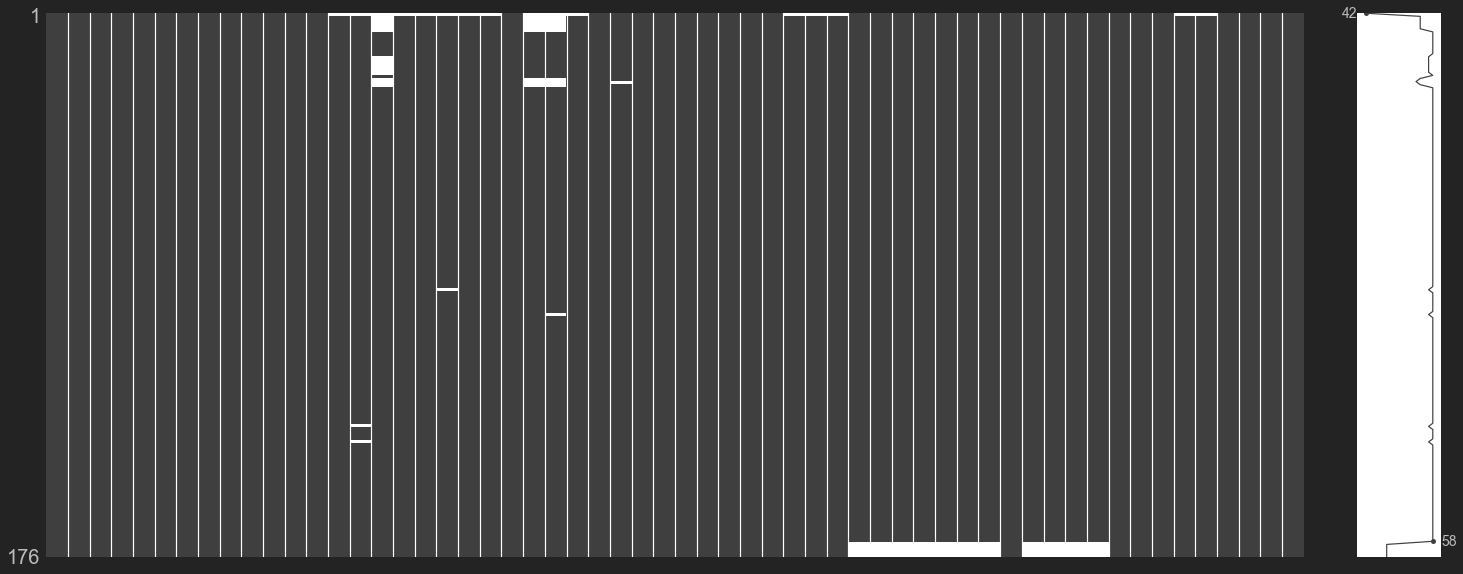

In [3]:
msno.matrix(df_manu);

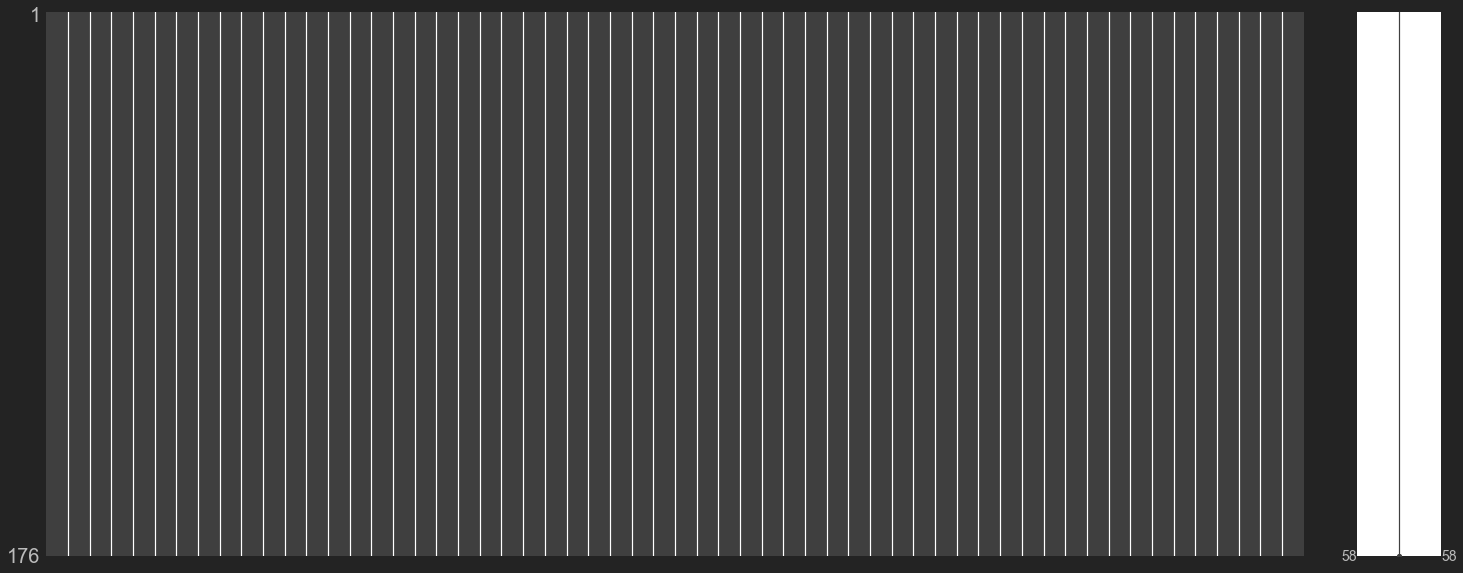

In [4]:
knn_impute = KNNImputer()
data_imputed = knn_impute.fit_transform(df_manu)
df_manu = pd.DataFrame(data_imputed, index=df_manu.index, columns=df_manu.columns)
msno.matrix(df_manu);

## c)

### Pre-processing to apply:
### 1. Zero and near zero variance
### 2. Center and scale
### 3. Outliers

In [5]:
def find_near_and_zero_var(df: pd.DataFrame, fraction_threshold=0.1, ratio_threshold=20):
    near_zero_cols = []
    zero_cols = []
    sample_size = df.shape[0]
    for column in df.columns.values:
        low_fraction = False
        large_ratio = False
        num_occurances = df[column].value_counts().nlargest(n=2)
        # Zero variance
        if num_occurances.size < 2:
            zero_cols.append(column)
        # Near zero variance
        else:
            if num_occurances.iloc[0] / num_occurances.iloc[1] >= ratio_threshold:
                large_ratio = True
            unique_vals = pd.unique(df[column])
            if unique_vals.size / sample_size <= fraction_threshold:
                low_fraction = True
            if low_fraction and large_ratio:
                near_zero_cols.append(column)
    return np.array(zero_cols), np.array(near_zero_cols)

In [6]:
zero, near_zero = find_near_and_zero_var(df_manu)
print(f'Near zero var = {near_zero.size}\nZero var = {zero.size}')

Near zero var = 1
Zero var = 0


In [7]:
near_zero

array(['BiologicalMaterial07'], dtype='<U20')

In [8]:
df_reduced = df_manu.drop(columns=near_zero)
df_reduced

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial08,BiologicalMaterial09,BiologicalMaterial10,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
0,38.00,6.25,49.58,56.97,12.74,19.51,43.73,16.66,11.44,3.46,...,0.0190,0.5,3.0,7.2,0.0,0.00,11.6,3.0,1.8,2.4
1,42.44,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,...,0.0190,2.0,2.0,7.2,0.1,0.15,11.1,0.9,1.9,2.2
2,42.03,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,...,0.0180,0.7,2.0,7.2,0.0,0.00,12.0,1.0,1.8,2.3
3,41.42,8.01,60.97,67.48,14.65,19.36,53.14,19.04,12.55,3.46,...,0.0180,1.2,2.0,7.2,0.0,0.00,10.6,1.1,1.8,2.1
4,42.49,7.47,63.33,72.25,14.02,17.91,54.66,18.22,12.80,3.05,...,0.0170,0.2,2.0,7.3,0.0,0.00,11.0,1.1,1.7,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,39.66,6.71,56.32,66.19,12.35,20.02,50.26,17.54,12.50,2.82,...,0.0206,2.3,0.0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
172,39.68,6.87,56.74,66.61,12.55,20.18,50.80,17.48,12.41,2.82,...,0.0200,1.0,0.0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
173,42.23,7.50,58.41,68.30,13.33,20.81,52.96,17.23,12.04,2.83,...,0.0200,1.3,0.0,0.0,0.0,0.00,0.0,0.6,0.0,0.0
174,38.48,7.53,58.36,69.25,14.35,20.57,51.31,17.87,12.77,3.55,...,0.0210,2.3,0.0,0.0,0.0,0.00,0.0,0.5,0.0,0.0


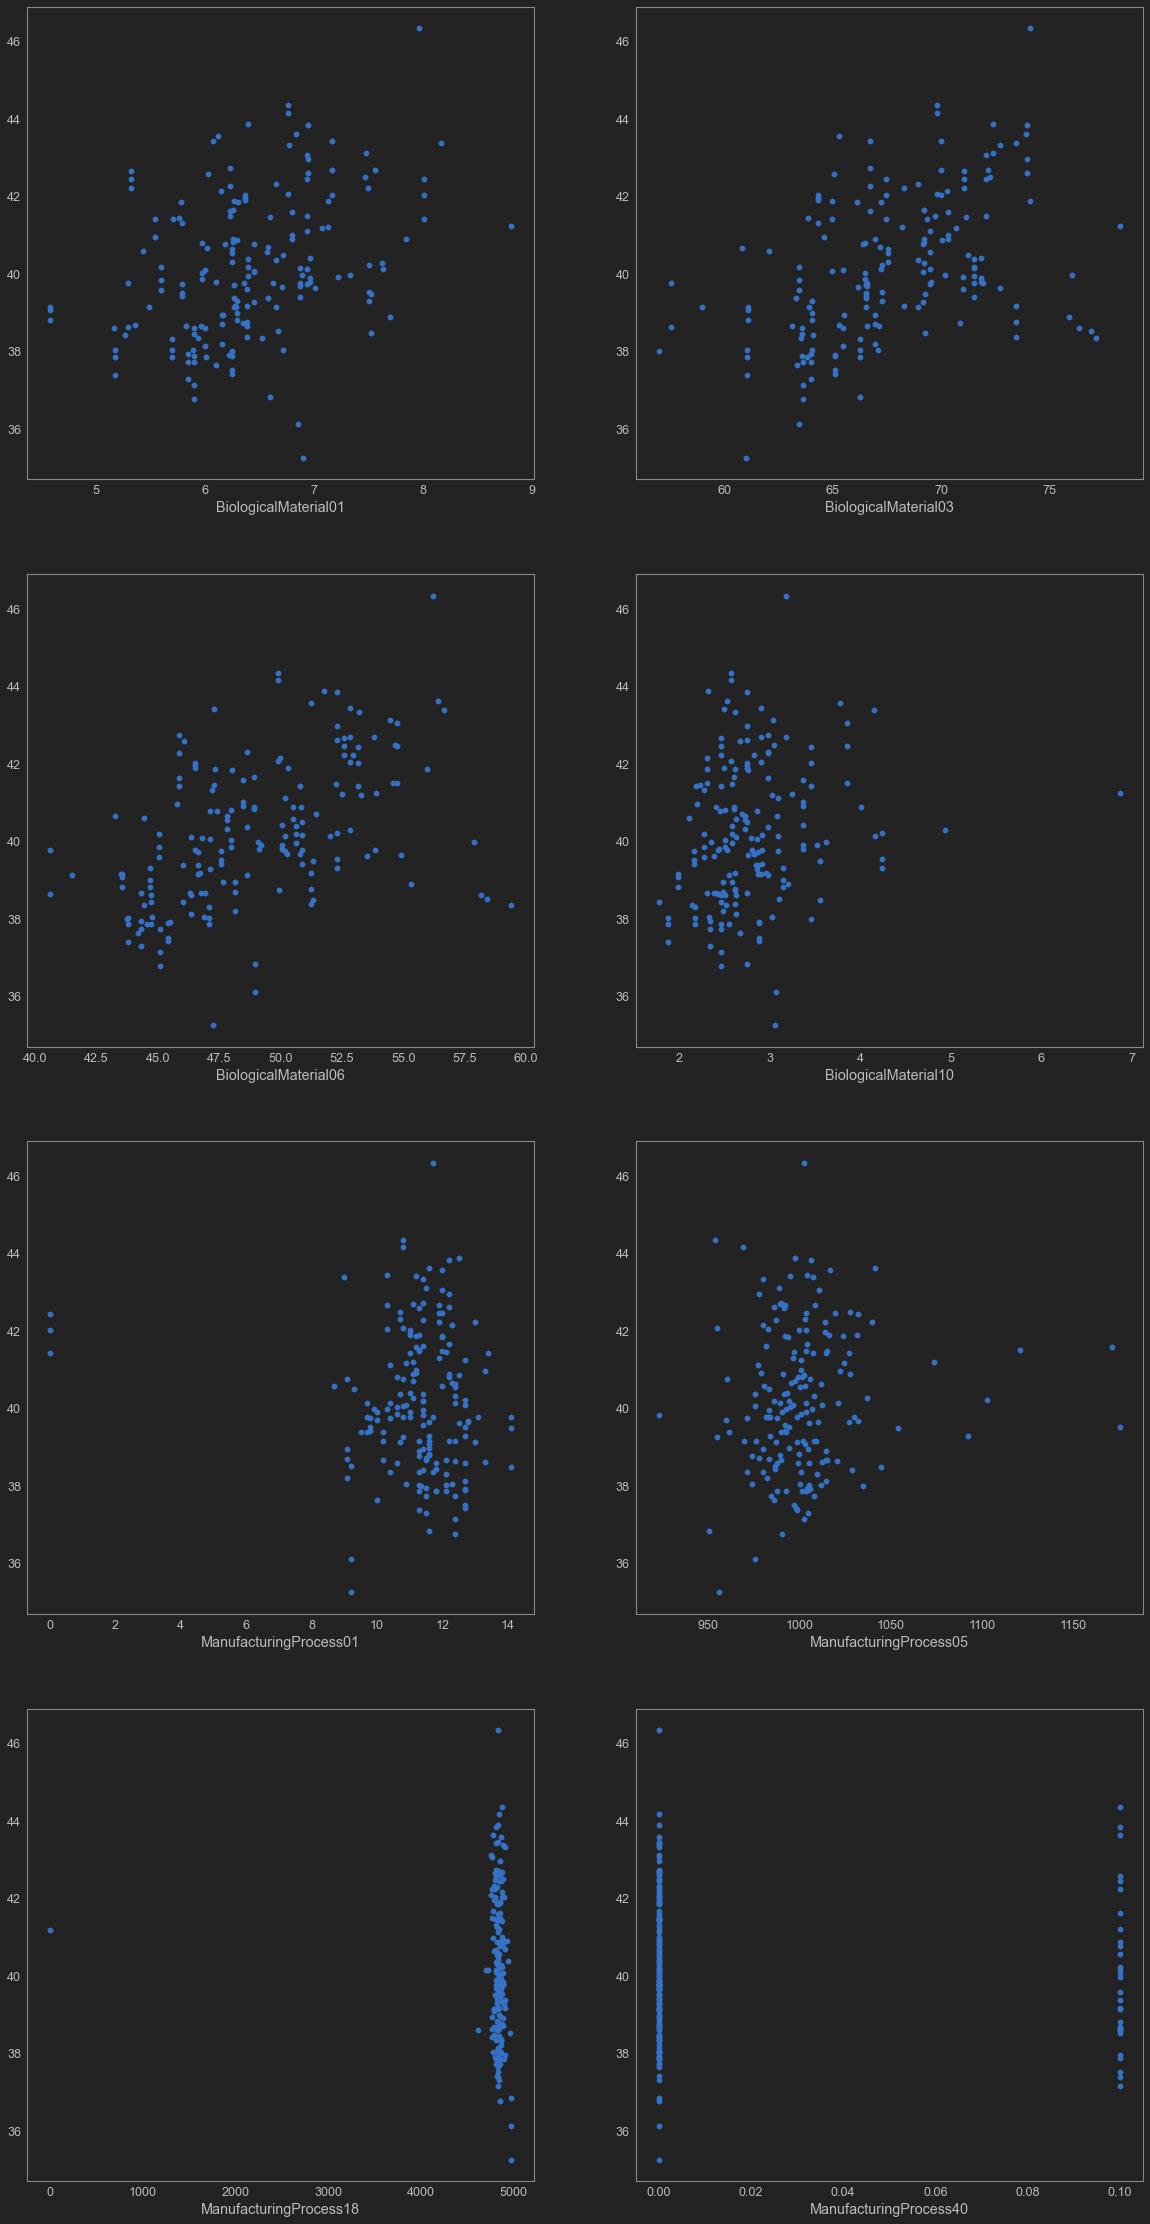

In [9]:
cols_to_plot = ['BiologicalMaterial01', 'BiologicalMaterial03', 'BiologicalMaterial06', 'BiologicalMaterial10',
                'ManufacturingProcess01', 'ManufacturingProcess05', 'ManufacturingProcess18', 'ManufacturingProcess40']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 40))
for col_name, ax in zip(cols_to_plot, axes.flatten()):
    col = df_reduced[col_name]
    ax.scatter(col, df_reduced['Yield'])
    ax.set_xlabel(col_name)

In [10]:
train, test = train_test_split(df_reduced)

scaler = StandardScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
test = pd.DataFrame(scaler.transform(test), columns=test.columns, index=test.index)

spatial_sign = Normalizer()
train = pd.DataFrame(spatial_sign.transform(train), columns=train.columns, index=train.index)
test = pd.DataFrame(spatial_sign.transform(test), columns=test.columns, index=test.index)

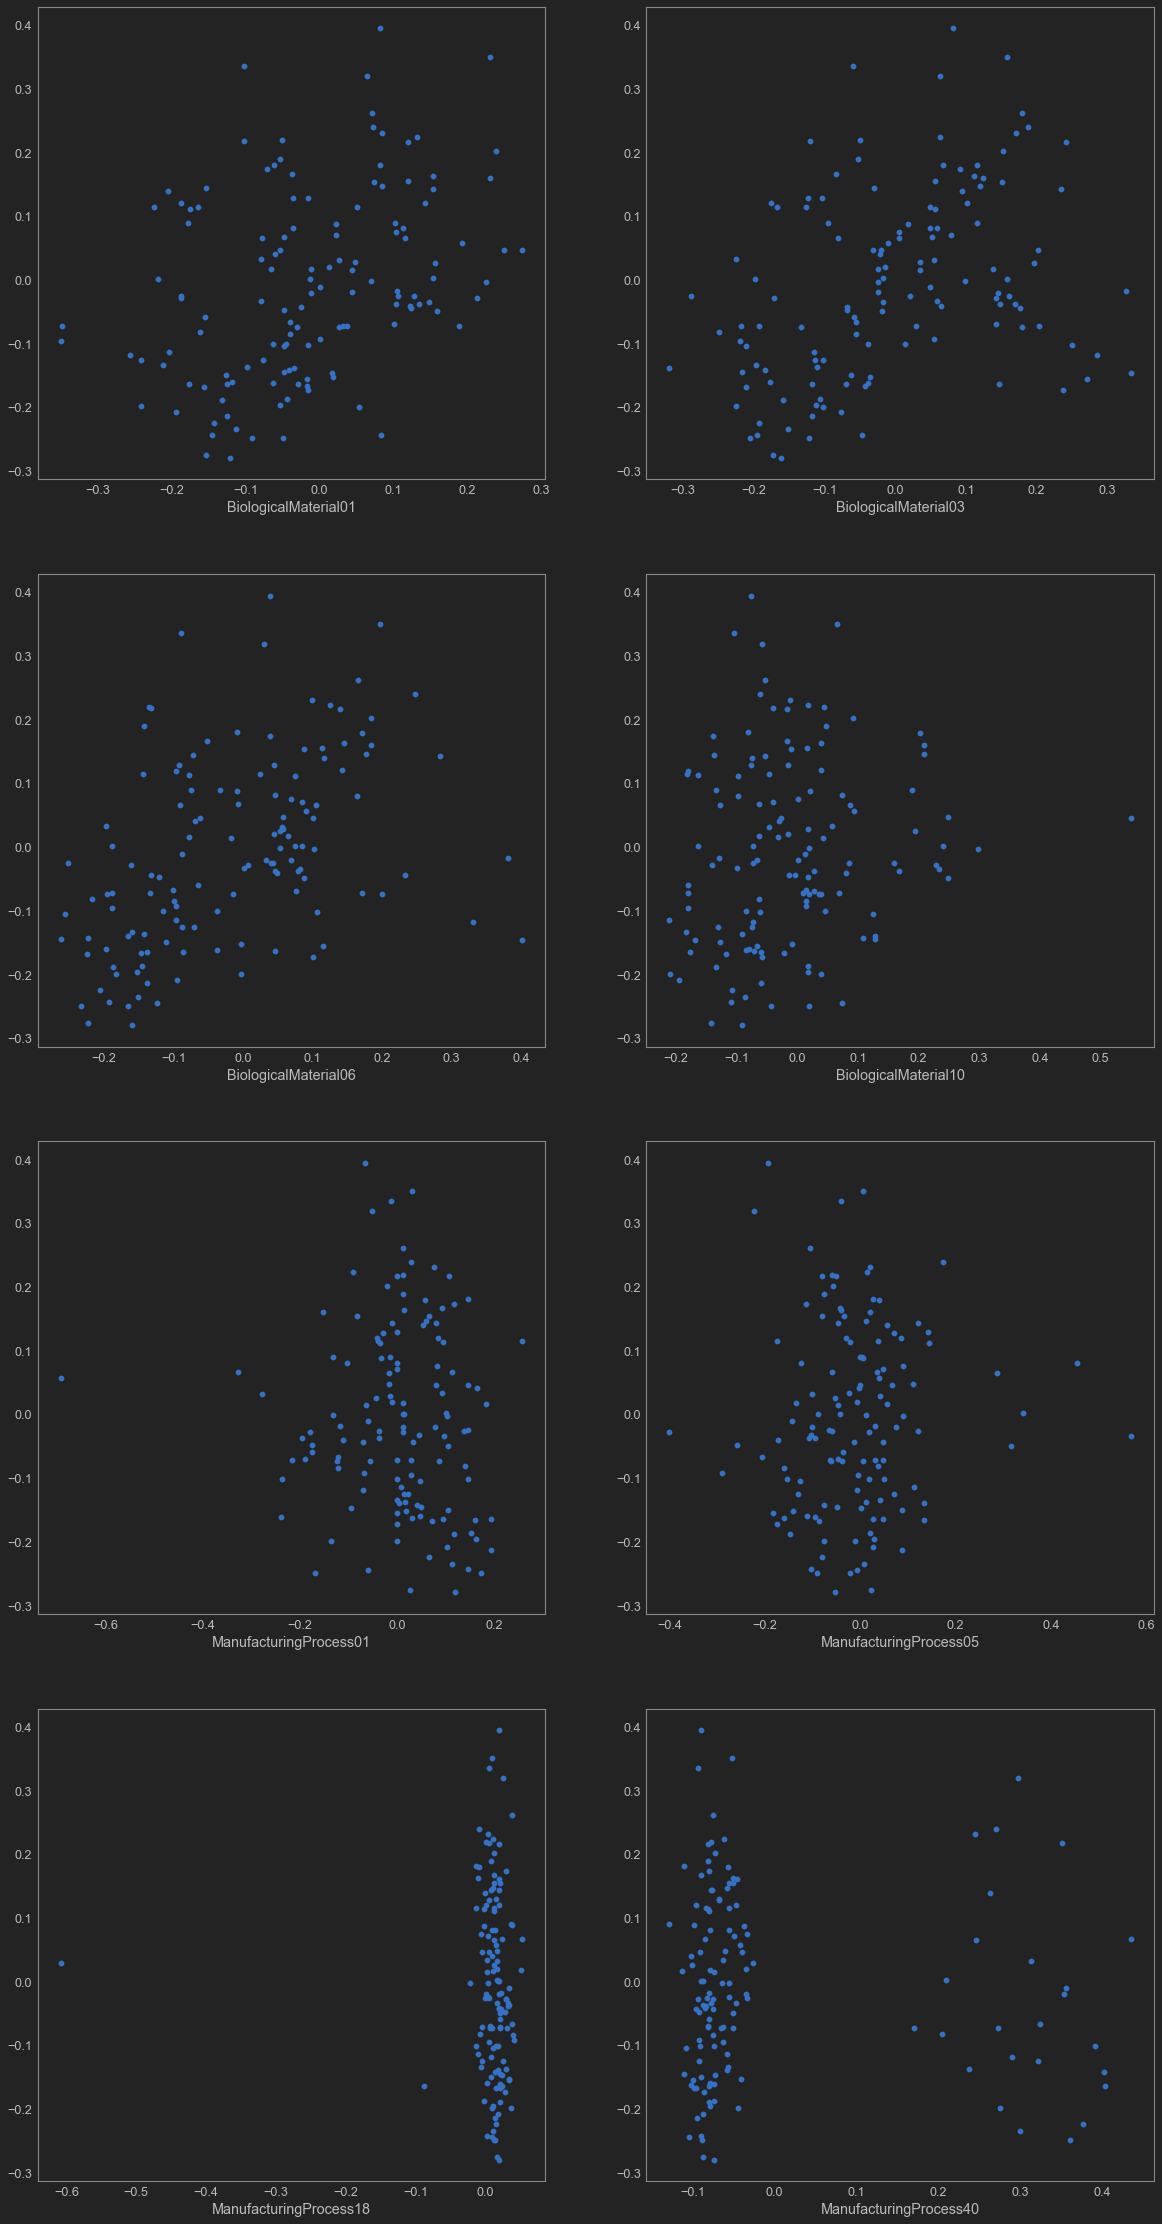

In [11]:
cols_to_plot = ['BiologicalMaterial01', 'BiologicalMaterial03', 'BiologicalMaterial06', 'BiologicalMaterial10',
                'ManufacturingProcess01', 'ManufacturingProcess05', 'ManufacturingProcess18', 'ManufacturingProcess40']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 40))
for col_name, ax in zip(cols_to_plot, axes.flatten()):
    col = train[col_name]
    ax.scatter(col, train['Yield'])
    ax.set_xlabel(col_name)

### The effects of spatial sign are not very visible here, because of the high dimensionality of the data.

In [12]:
def score_model(model, X, Y):
    predictions = model.predict(X)
    return r2_score(y_true=Y, y_pred=predictions), np.sqrt(mean_squared_error(y_true=Y, y_pred=predictions))

def print_score(model_name, parameter_name, parameter_values, rmses, r2s):
    rmse_best_idx = rmses.argmin()
    rmse_best_value = rmses[rmse_best_idx]
    r2_best_idx = r2s.argmax()
    r2_best_value = r2s[r2_best_idx]
    print(f'{model_name} acheives the optimal result for {parameter_name} = {parameter_values[rmse_best_idx]} with \n'
          f'RMSE = {rmse_best_value}\n'
          f'R-Squared = {r2_best_value}')

def plot_r2_rmse(r2s, rmses, x_label, x_vals):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.plot(x_vals, r2s)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('R^2')
    ax2.plot(x_vals, rmses)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel('RMSE');

In [13]:
X_train, Y_train = train.drop(columns='Yield'), train['Yield']
X_test, Y_test = test.drop(columns='Yield'), test['Yield']

In [14]:
def do_ridge(X_train, X_test, Y_train, Y_test, alpha_min, alpha_max):
    alphas = np.linspace(alpha_min, alpha_max, 50)
    r2s_ridge = np.empty(alphas.size)
    rmses_ridge = np.empty(alphas.size)
    for i, alpha in enumerate(alphas):
        model = Ridge(alpha=alpha)
        model.fit(X_train, Y_train)
        r2s_ridge[i], rmses_ridge[i] = score_model(model, X_test, Y_test)

    plot_r2_rmse(r2s=r2s_ridge, rmses=rmses_ridge, x_label='Alpha', x_vals=alphas)
    print_score(model_name='Ridge', parameter_name='alpha', parameter_values=alphas, rmses=rmses_ridge, r2s=r2s_ridge)

C:\Users\mikko\anaconda3\envs\all_purpose\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95284e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge acheives the optimal result for alpha = 0.0 with 
RMSE = 0.07093485634598296
R-Squared = 0.763664818113044


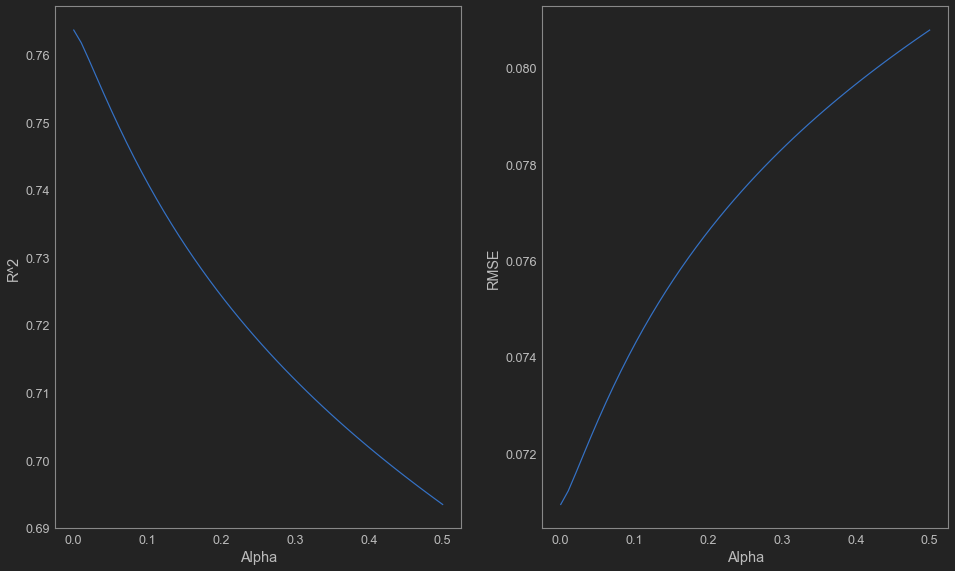

In [18]:
do_ridge(X_train, X_train, Y_train, Y_train, alpha_min=0.0, alpha_max=0.5)

## c)

Ridge acheives the optimal result for alpha = 0.9938775510204082 with 
RMSE = 0.08767977229227457
R-Squared = 0.5538049885947789


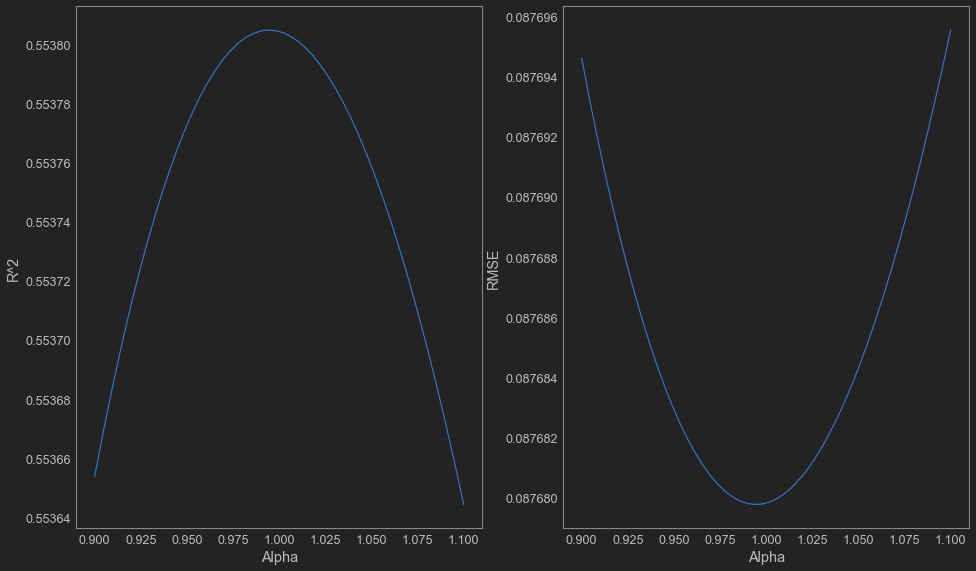

In [21]:
do_ridge(X_train, X_test, Y_train, Y_test, alpha_min=0.9, alpha_max=1.1)

Text(0, 0.5, 'Observed')

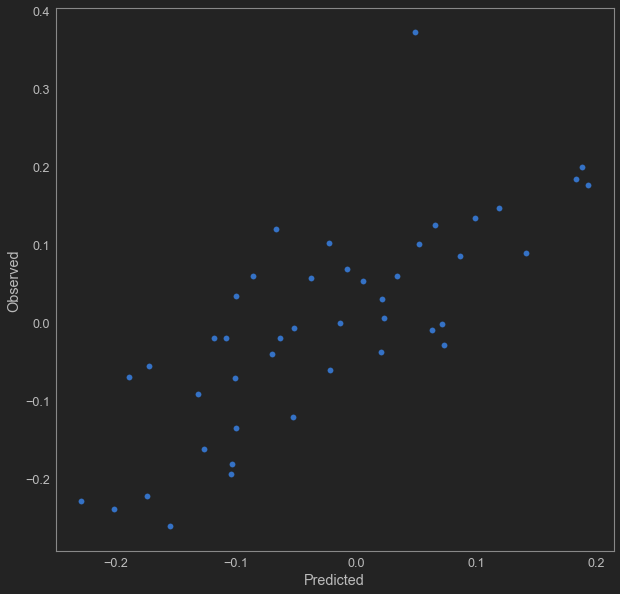

In [24]:
best_alpha = 0.9938775510204082
ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, Y_train)
predictions = ridge.predict(X_test)
plt.subplots(figsize=(10, 10))
plt.scatter(predictions, Y_test)
plt.xlabel('Predicted')
plt.ylabel('Observed')

<AxesSubplot:xlabel='Predictions', ylabel='Yield'>

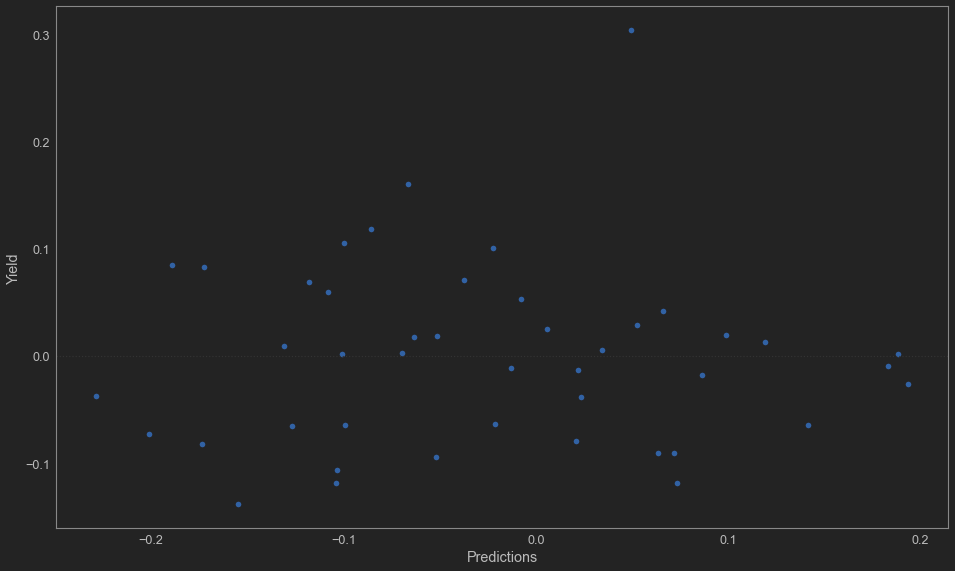

In [29]:
fig, ax = plt.subplots()
ax.set_xlabel('Predictions')
residplot(x=predictions, y=Y_test, ax=ax)

## e)

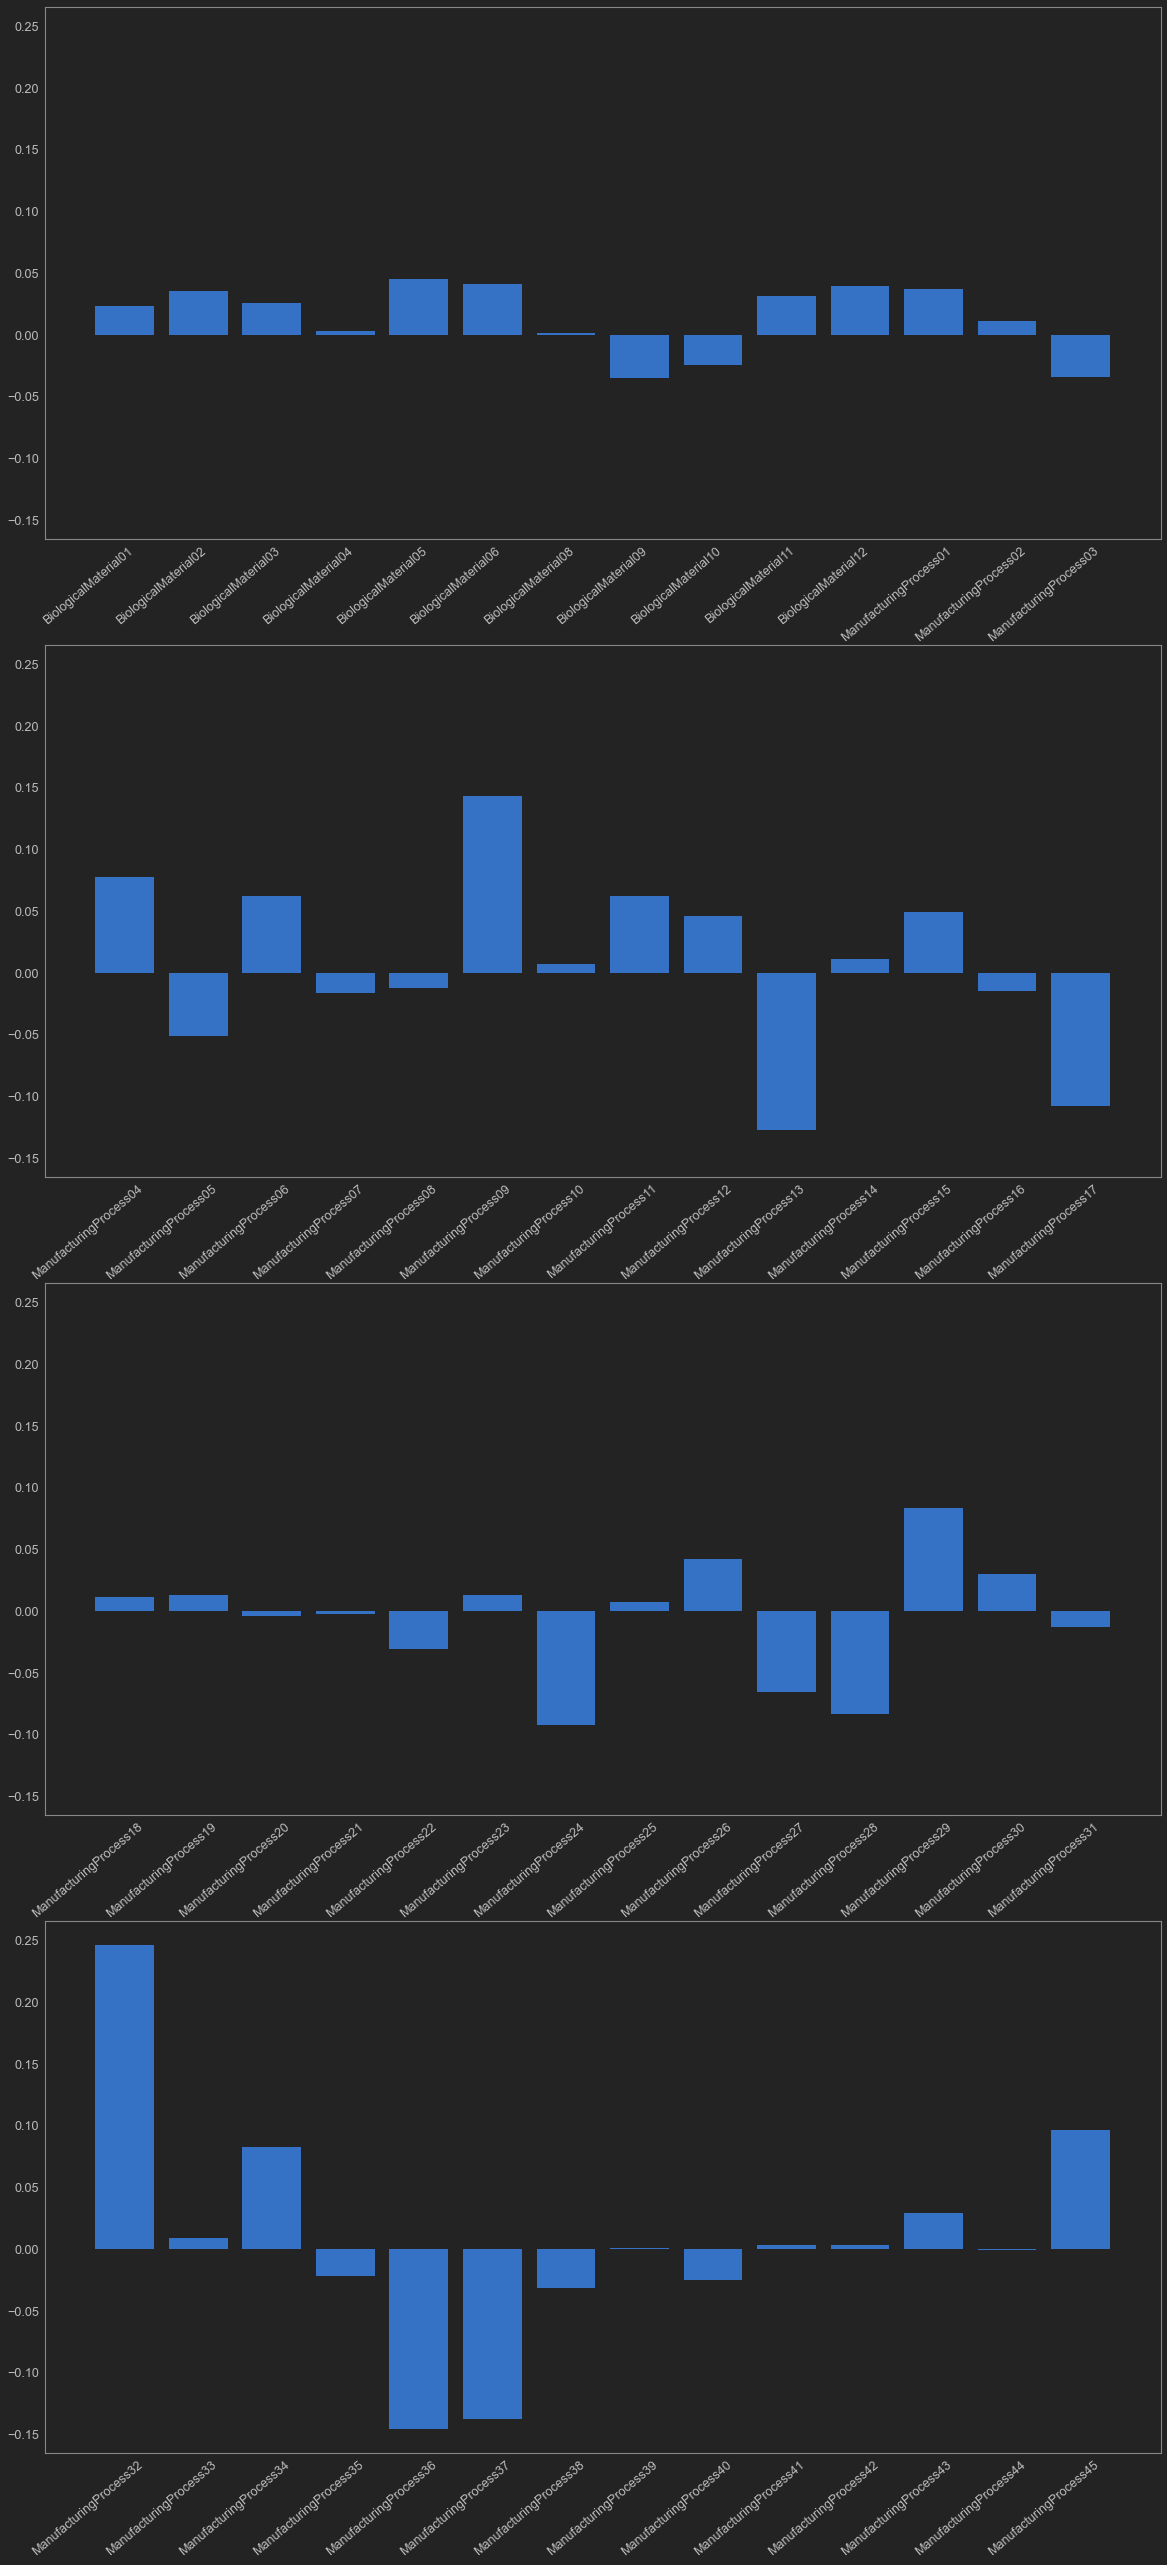

In [58]:
fig, axes = plt.subplots(nrows=4, figsize=(20, 45), sharey=True)
predictors = X_test.columns
for i, ax in zip(range(0, predictors.size - 13, 14), axes.flatten()):
    predictors_part = predictors[i:i + 14]
    coefficients = ridge.coef_[i:i + 14]
    num_predictors = predictors_part.size
    ax.bar(x=np.arange(num_predictors), height=coefficients)
    ax.set_xticks(np.arange(num_predictors) - 0.5)
    ax.set_xticklabels(predictors_part, rotation=40);

## f)

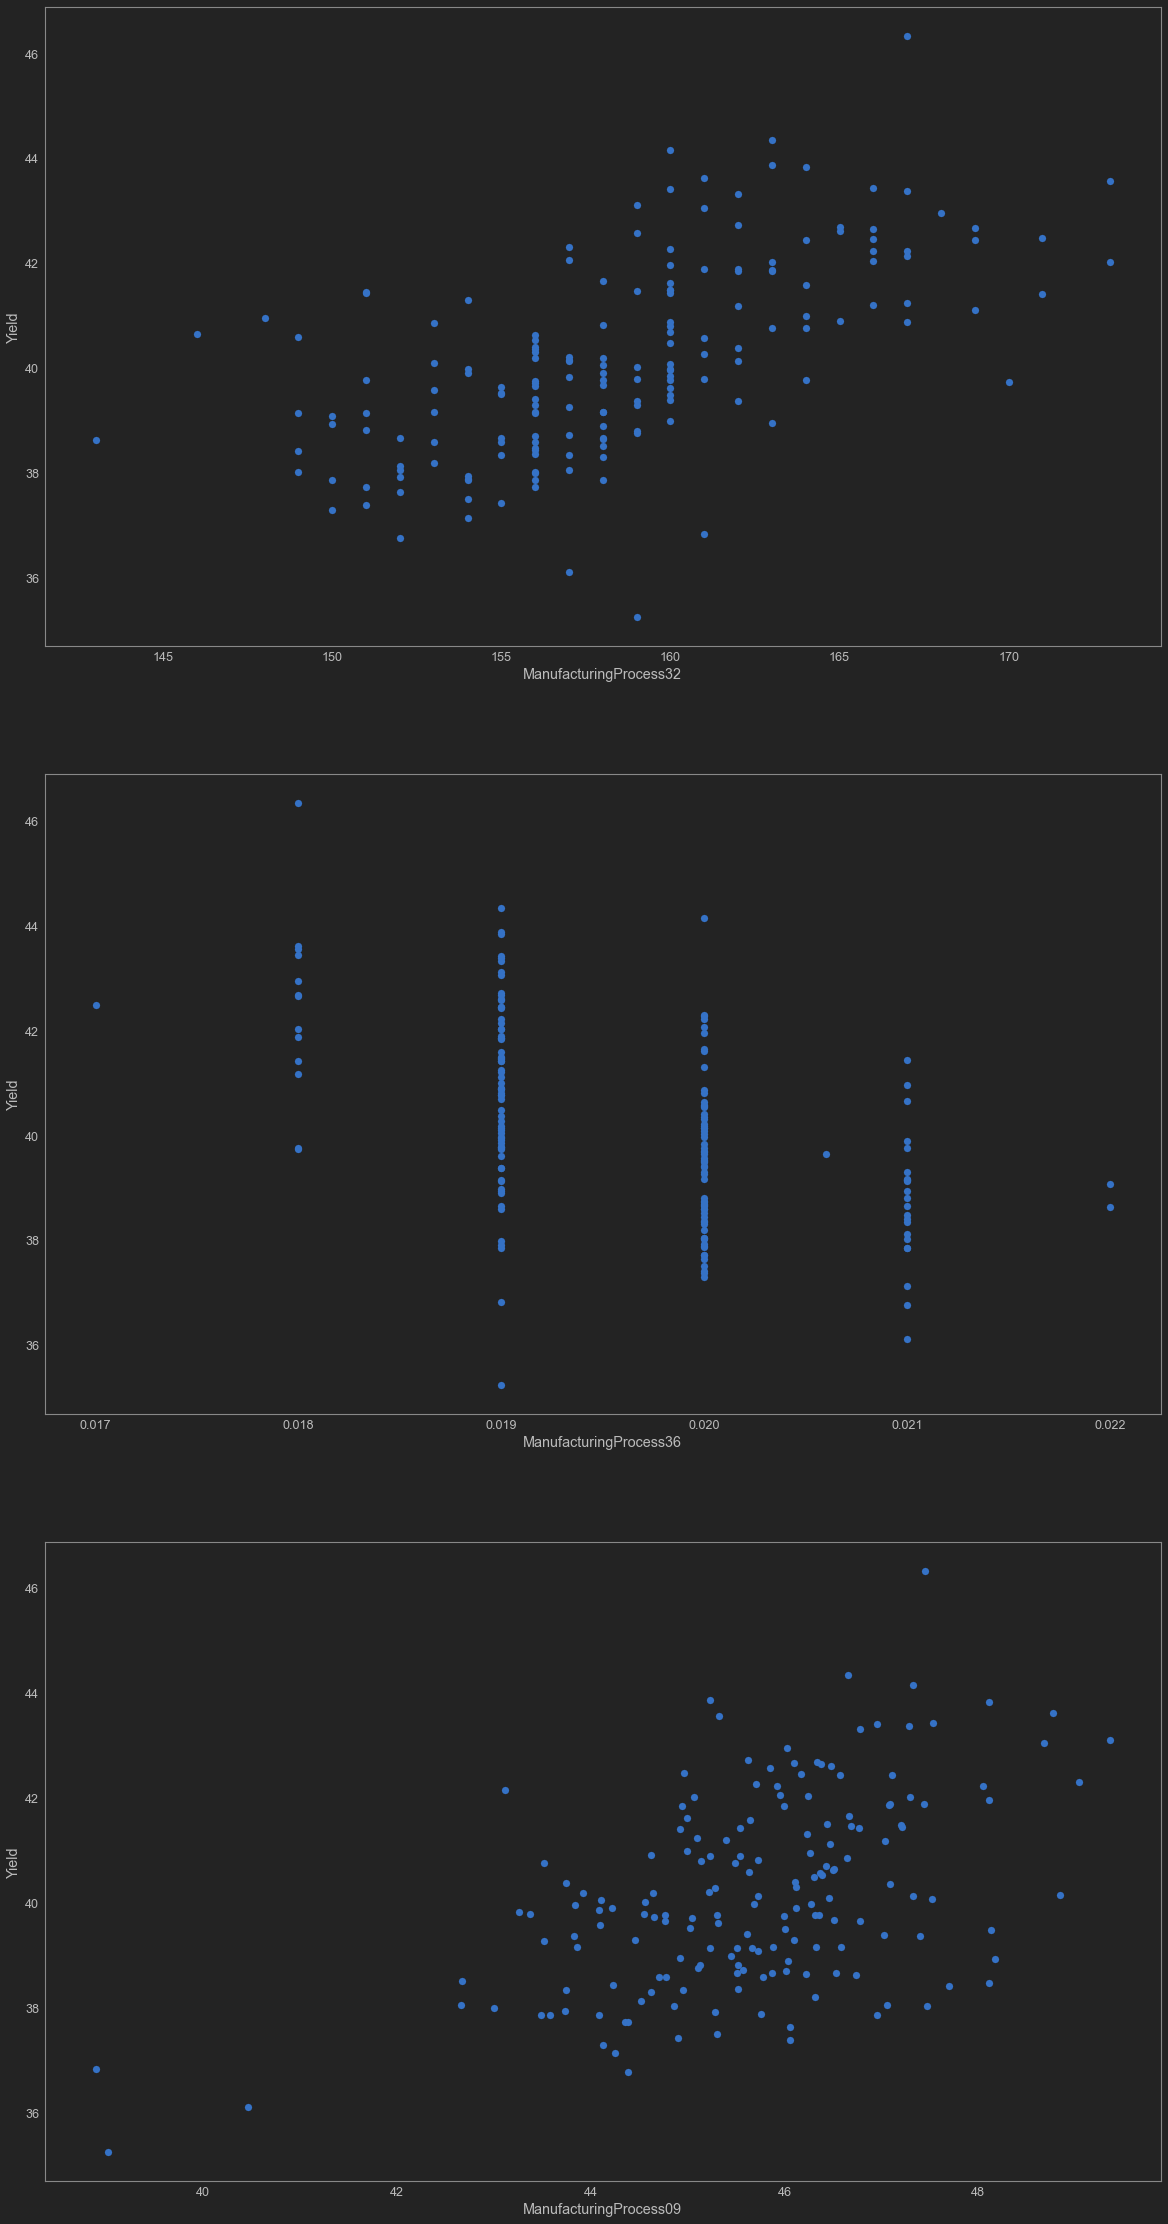

In [67]:
top_predictors = ['ManufacturingProcess32', 'ManufacturingProcess36', 'ManufacturingProcess09']
fig, axes = plt.subplots(nrows=3, figsize=(20, 40))
for ax, predictor in zip(axes.flatten(), top_predictors):
    ax.scatter(df_reduced[predictor], df_reduced['Yield'], s=50)
    ax.set_xlabel(predictor)
    ax.set_ylabel('Yield')

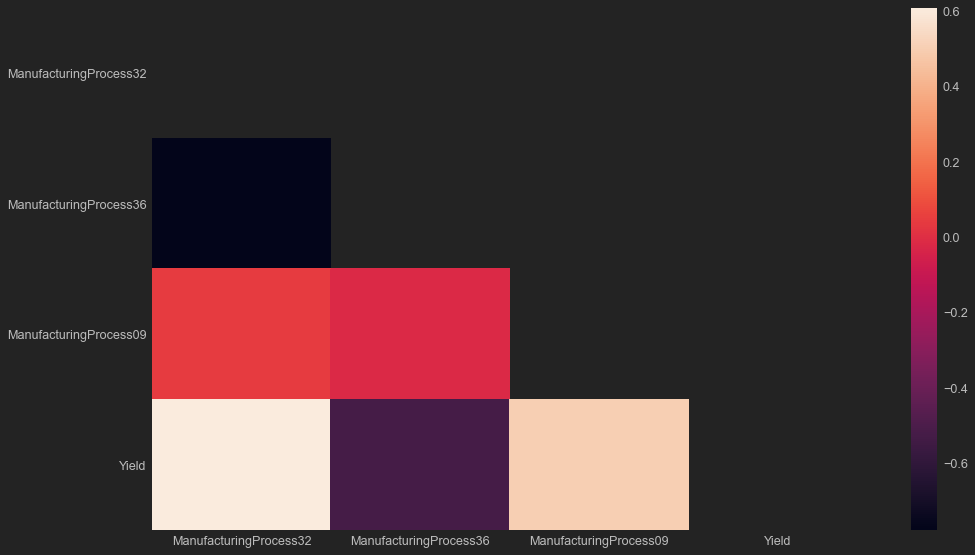

In [69]:
df_corr = df_reduced[top_predictors + ['Yield']]
corr =df_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap(corr, mask=mask);